<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# What to expect in this chapter

1. basic Matplotlib for simple plots.
2. Another approach: Object Oriented (OO) interface.
3. OO interface provides more nuanced control over plots.
4. Contrasts with the "Matlab-like" pyplot interface.
5. Focus shifts to demonstrating OO interface for better manipulation of axes and plot elements.






# 1 Some nomenclature

Matplotlib figure: figure, canvas to draw things on

Axis: individual mathematical axes used for plotting

- Can have a single figure with multiple axes (e.g. a figure with 4 graphs)

# 2 Comparing the two ‘dialects’

In [3]:
#data to plot
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

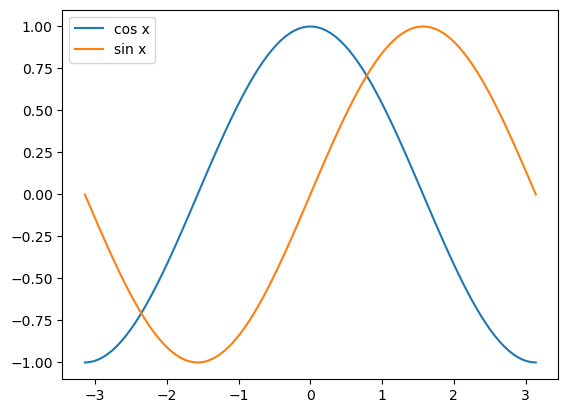

In [8]:
#PYPLOT INTERFACE
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

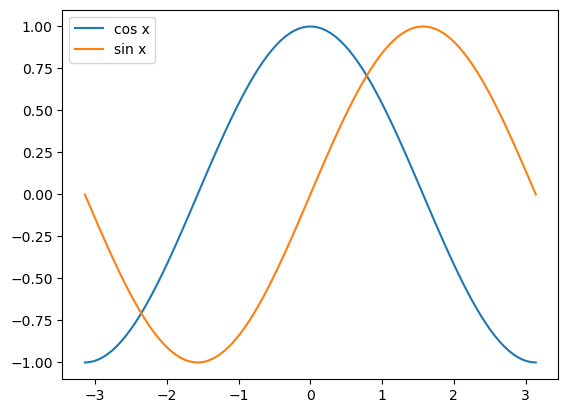

In [9]:
#OO INTERFACE
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

- Start with subplots() to create a figure and axis in the Object Oriented (OO) interface.
- Returns fig for the figure and ax for the axis, though variable names can be customized.
- Commonly used names in documentation.
- Example mentions using one column and one row, but grid-like arrangements are possible.
- Despite initial complexity, OO interface offers greater freedom and control for complex plots.

# 3 What is OO ax, really?

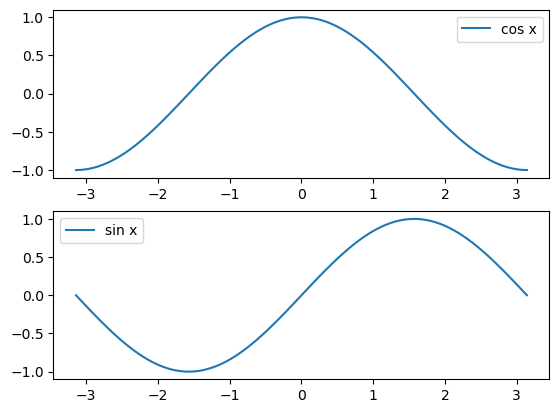

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1)
#fig and ax together (1 figure)
#nrows = 2: asking for 2 rows
#ncols=1: 1 column

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [13]:
#WHAT IS ax?
type(ax)
#it is a numpy array

numpy.ndarray

In [15]:
#WHAT SIZE IS ax?
ax.shape
#ax has 2 'things'

(2,)

In [17]:
#WHAT IS CONTAINED IN ax?
type(ax[0])
#Matplotlib axis

matplotlib.axes._axes.Axes

# 4 A complete OO example

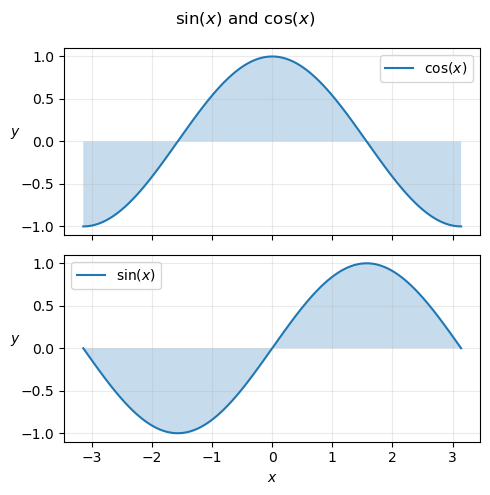

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1,  #2 rows, 1 column
                       figsize=(5, 5),    #specify the size of the figure
                       sharex=True)       #both plots share the same x-axis (x-axis not printed twice)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')  #numpy array so indexed 0 and 1
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25) #fill_between() to fill the plots

for a in ax:                              #using a for loop to draw the legends, adding grid and setting the label the same in the for loop
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')                  #sharing the same x-axis so only label the lowest plot

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') #adding an overall title to the entire figure (not each plot)
fig.tight_layout()                       #it makes the entire figure look nice

Text(0.5, 0.98, '$\\sin(x)$ and $\\cos(x)$')

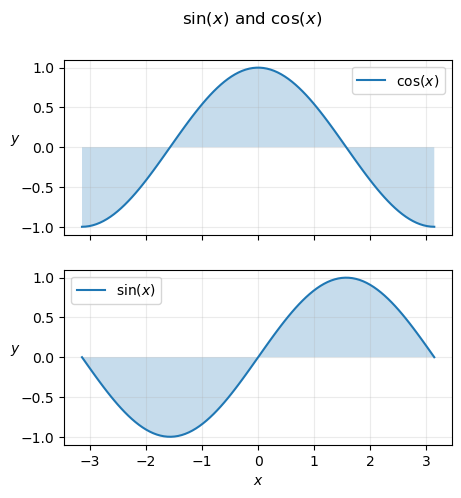

In [22]:
#without tightplot - too much space between the title and axes and between graphs also

fig, ax = plt.subplots(nrows=2, ncols=1,  #2 rows, 1 column
                       figsize=(5, 5),    #specify the size of the figure
                       sharex=True)       #both plots share the same x-axis (x-axis not printed twice)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')  #numpy array so indexed 0 and 1
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25) #fill_between() to fill the plots

for a in ax:                              #using a for loop to draw the legends, adding grid and setting the label the same in the for loop
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')                  #sharing the same x-axis so only label the lowest plot

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') #adding an overall title to the entire figure (not each plot)

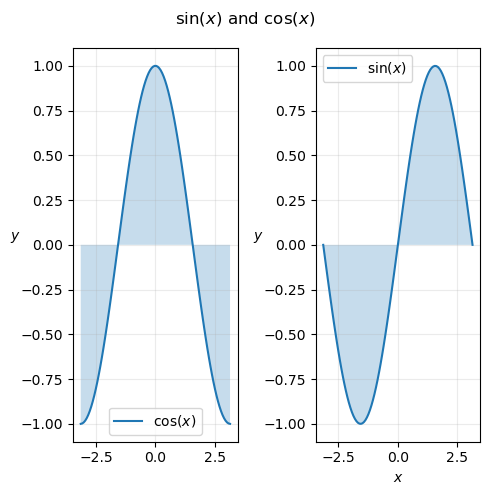

In [24]:
#changing to 2 columns and 1 row for fun

fig, ax = plt.subplots(nrows=1, ncols=2,  #1 row, 2 columns
                       figsize=(5, 5),    #specify the size of the figure
                       sharex=True)       #both plots share the same x-axis (x-axis not printed twice)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')  #numpy array so indexed 0 and 1
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25) #fill_between() to fill the plots

for a in ax:                              #using a for loop to draw the legends, adding grid and setting the label the same in the for loop
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')                  #sharing the same x-axis so only label the lowest plot

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') #adding an overall title to the entire figure (not each plot)
fig.tight_layout()    

# 5 Multiple rows and columns

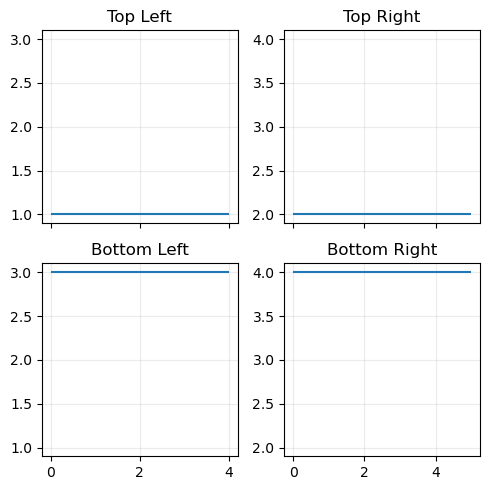

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2,          #2 rows and 2 columns
                       figsize=(5, 5),
                       sharex='col', sharey='col')#make it more compact, show how to share

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

#setting titles to the respective places
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

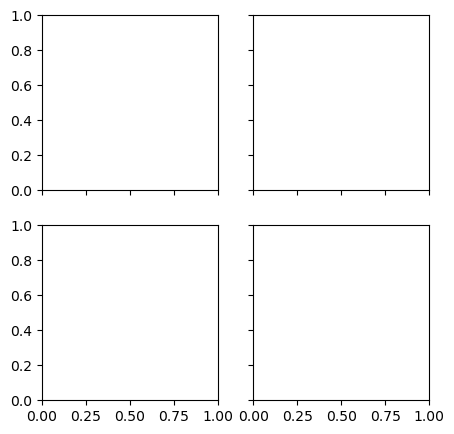

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

In [28]:
#HOW IS ax STRUCTURED?
ax.shape
#it is a 2x2 array

(2, 2)

Text(0.5, 1.0, 'Bottom Right')

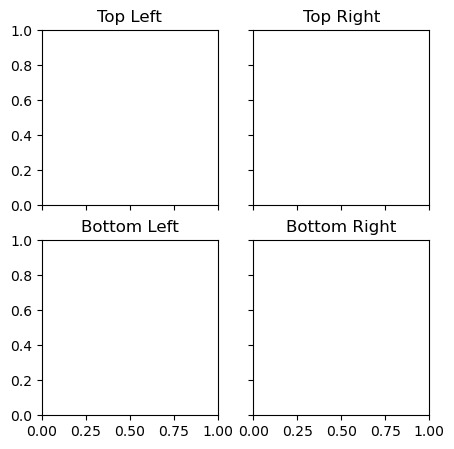

In [31]:
#accessing each graph and placing a title
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

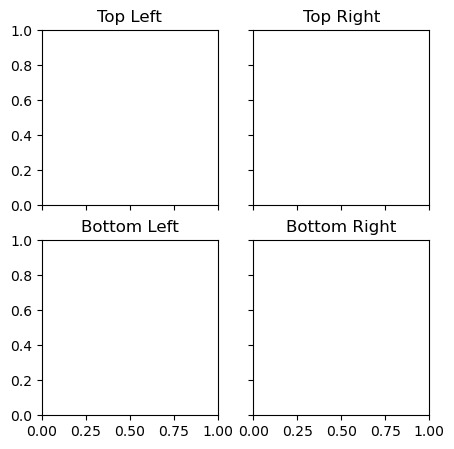

In [35]:
#accessing each graph and placing a title
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

#creating a variable to address each axis
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

#OR

top_left, top_right, bottom_left, bottom_right = ax.flatten()

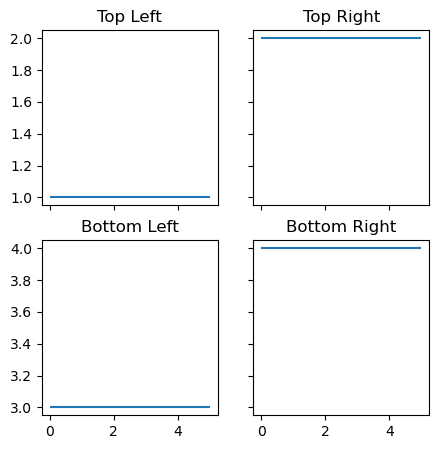

In [39]:
#accessing each graph and placing a title
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

#creating a variable to address each axis
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

#OR

top_left, top_right, bottom_left, bottom_right = ax.flatten()

#to only plot lines
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

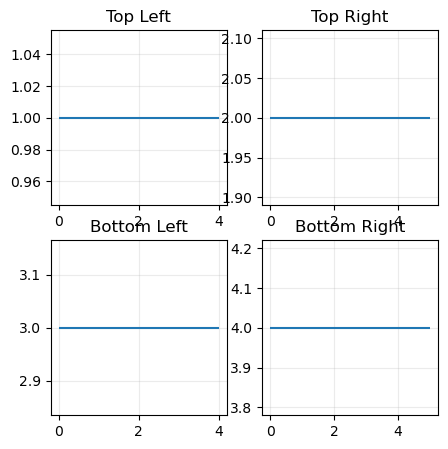

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=2,          #2 rows and 2 columns
                       figsize=(5, 5)
                      )

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

#setting titles to the respective places
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

SHARE AXES

|OPTION|RESULT|
|:--|--:|
|True|Makes all the axes use the same range.|
|col|same range for all the columns|
|row|Use the same range for all the rows|

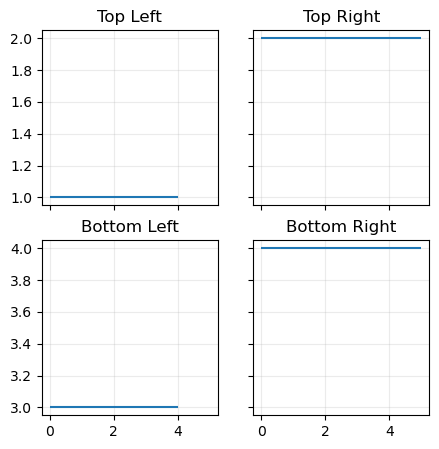

In [48]:
#SHARING AXES BY ROWS
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

#setting titles to the respective places
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

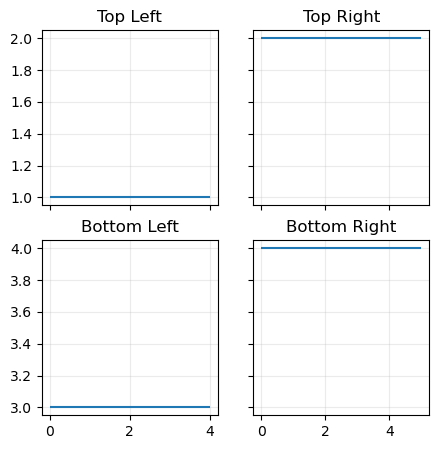

In [49]:
#SHARING X AXIS BY COL AND Y AXIS BY ROW
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

#setting titles to the respective places
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

## 5.2 Accessing all axes

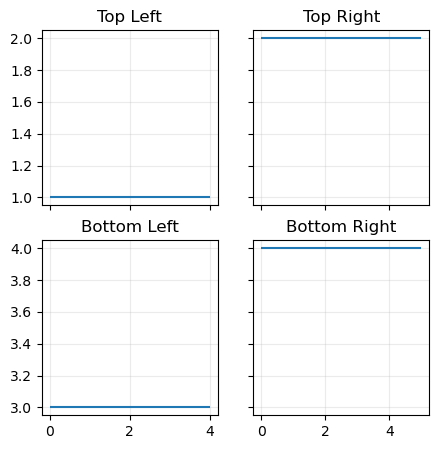

In [8]:
#SHARING X AXIS BY COL AND Y AXIS BY ROW
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)     

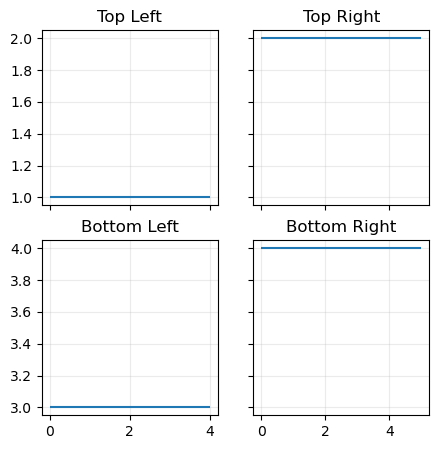

In [9]:
#SHARING X AXIS BY COL AND Y AXIS BY ROW
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)         #a for loop to make accessing grids look neater

# 6 Other useful plots

## 6.1 Histograms

### Data

- need to read the data from the csv files multiple times
  1. Create a get_plot_data() function first

### A quick helper function

In [10]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

In [11]:
get_plot_data()

{'All': array([3701., 2850., 3053., ..., 3856., 3303., 3245.]),
 'NUS': array([2741., 3057., 3098., 2960., 3404., 2740., 3065., 3350., 3933.,
        3277., 3266., 4106., 3007., 2961., 2839., 2823., 3245., 3140.,
        3592., 3286., 2940., 3153., 3330., 3036., 3155., 4922., 4406.,
        2687., 2896., 2850., 2726., 3101., 3473., 2719., 3141., 3192.,
        3234., 3979., 2836., 3350., 3107., 3729., 3183., 3684., 4054.,
        4290., 2600., 3089., 2931., 2966., 3277., 3212., 3674., 3306.,
        3375., 3250., 3591., 3054., 3160., 5027., 4404., 2976., 3123.,
        2760., 2804., 3224., 3467., 2839., 3266., 3317., 3164., 4173.,
        2817., 3547., 3230., 3847., 3255., 3597., 4053., 4054., 2907.,
        2989., 3146., 3256., 3400., 3300., 4119., 3452., 3768., 3318.,
        3624., 3121., 3279., 4866., 4352., 3175., 3219., 3244., 3203.,
        2859., 3245., 3431., 3400., 2971., 3258., 3341., 4173., 3314.,
        3414., 3402., 3884., 3669., 3549., 3432., 3788., 3381., 3470.,
      

### The histogram

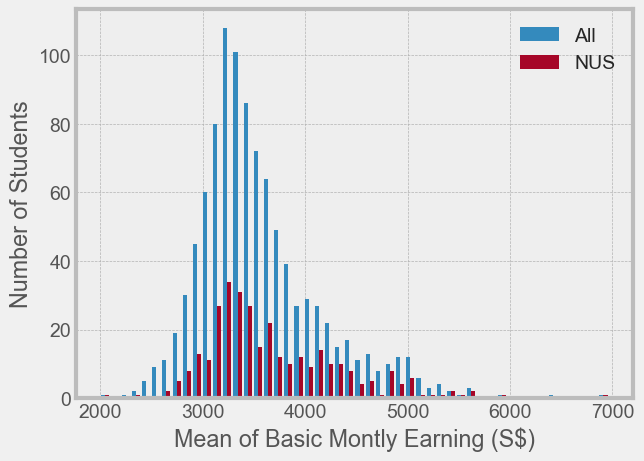

In [16]:
plt.style.use('bmh')    #a pre-defined plot style
data = get_plot_data()  #calling our own function to access the data

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

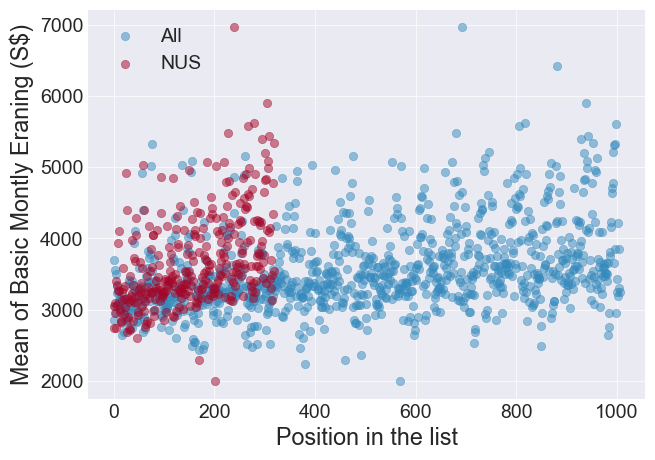

In [17]:
plt.style.use("seaborn-v0_8-darkgrid")  #using a style

data = get_plot_data()  #calling function to access data

for label, numbers in data.items():   #data.items() has 2 - label and numbers
    x = range(len(numbers))           
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

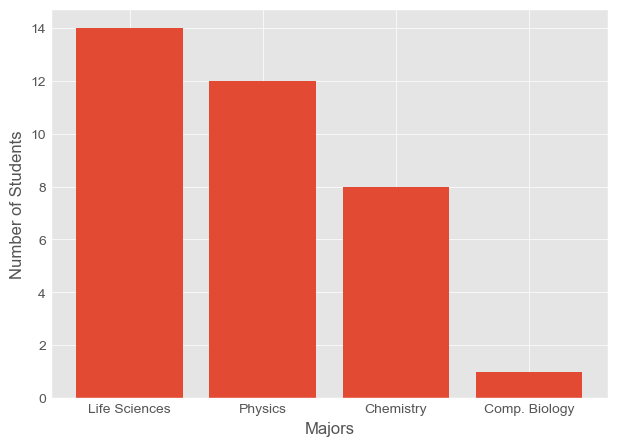

In [20]:
student_numbers = {'Life Sciences': 14,   #manually add in the numbers here
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())     #keys are the x-axis and values are the y-axis
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)                 #x,y - majors,numbers (variables defined above)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

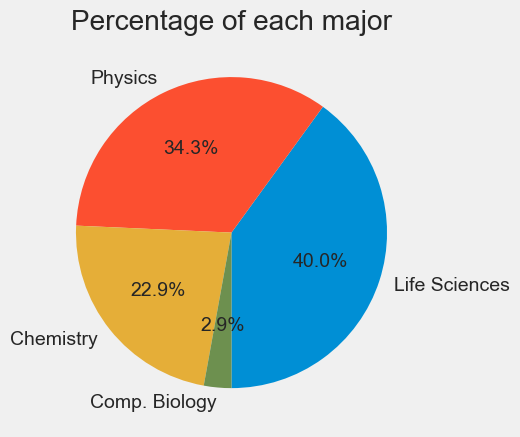

In [21]:
student_numbers = {'Life Sciences': 14,    #manually type in like for bar graphs
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())      #same as bar graphs
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # copy exactly how to format the percentages
        startangle=-90       # start angle - -90 means it starts at the bottom of the pie chart and goes anti-clockwise in the above order in the dictionary     
        )
plt.title('Percentage of each major')